<a href="https://colab.research.google.com/github/thanaprondtn/python_dataviz2024/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW9 present radar chart data india

## นำเข้าข้อมูล

In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/data_viz_2024_DATA'

In [ ]:
movie_df = pd.read_csv(os.path.join(path,'IMDb_Movies_India.csv'), encoding='latin-1')
movie_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


#จัดการข้อมูล

In [ ]:
movie_df = movie_df.isnull().sum()
print(movie_df[movie_df > 0].sort_values(ascending=False))

Duration    8269
Rating      7590
Votes       7589
Actor 3     3144
Actor 2     2384
Genre       1877
Actor 1     1617
Year         528
Director     525
dtype: int64


In [ ]:
#drop ค่า null
movie_df = pd.read_csv(os.path.join(path,'IMDb_Movies_India.csv'), encoding='latin-1') # Reload the DataFrame
movie_df = movie_df.dropna(subset=['Rating', 'Genre', 'Votes', 'Director'])

In [ ]:
#หลัง dropna แล้วข้อมูลเหลือกี่ % จากเดิม
print(f"ข้อมูลเหลือ {(len(movie_df) / len(pd.read_csv(os.path.join(path,'IMDb_Movies_India.csv'), encoding='latin-1'))) * 100:.2f}% จากเดิม")

ข้อมูลเหลือ 50.37% จากเดิม


In [ ]:
# แปลงคอลัมน์ Duration เป็นตัวเลข
movie_df['Duration'] = pd.to_numeric(movie_df['Duration'].str.replace(' min', ''), errors='coerce')

# คำนวณค่าเฉลี่ยของ Duration ที่ไม่ใช่ NaN
duration_mean = movie_df['Duration'].mean()

# แทนที่ค่า NaN ด้วยค่าเฉลี่ย
movie_df['Duration'] = movie_df['Duration'].fillna(duration_mean)

In [ ]:
movie_df['Actor 1'] = movie_df['Actor 1'].fillna('Unknown')
movie_df['Actor 2'] = movie_df['Actor 2'].fillna('Unknown')
movie_df['Actor 3'] = movie_df['Actor 3'].fillna('Unknown')

In [ ]:
movie_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109.00000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110.00000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147.00000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142.00000,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82.00000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),132.25348,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125.00000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),132.25348,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129.00000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
movie_df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
movie_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109.00000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110.00000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147.00000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142.00000,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82.00000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),132.25348,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125.00000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),132.25348,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129.00000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
movie_df['Votes'] = movie_df['Votes'].str.replace(',', '').astype(int)

#ต้องการเปรียบเทียบ Director ที่ทำหนังประเภท Drama กับ Action โดยมีตัวชี้วัด ดังนี้


*   Genre_Count: จำนวนหนังในแต่ละประเภท
*   Popularity: ความนิยมเฉลี่ยของหนัง (Rating/Votes)
*   Duration_Mean: ความยาวเฉลี่ยของหนัง
*   Top_Actor_Count: จำนวนนักแสดงที่มีความนิยมสูงกว่าค่าเฉลี่ย
*   Remake_Movies: จำนวนหนังที่นำมา remake (ดูเรื่องที่ซ้ำ)








In [ ]:
# คัดกรองหนังประเภท Drama และ Action
drama_df = movie_df[movie_df['Genre'].str.contains('Drama', na=False)].copy()
action_df = movie_df[movie_df['Genre'].str.contains('Action', na=False)].copy()

In [ ]:
def calculate_summary(movie_df, genre):
    genre_count = movie_df['Name'].count()
    mean_rating = movie_df['Rating'].mean()
    mean_votes = movie_df['Votes'].mean()
    popularity = mean_rating / mean_votes if mean_votes != 0 else 0
    duration_mean = movie_df['Duration'].mean()

    # คำนวณ Popularity สำหรับแต่ละนักแสดง
    actor_popularity = pd.DataFrame()
    for col in ['Actor 1', 'Actor 2', 'Actor 3']:
        actor_pop = movie_df.groupby(col)['Rating'].mean() / movie_df.groupby(col)['Votes'].mean()
        actor_popularity = pd.concat([actor_popularity, actor_pop])

    # นับจำนวนนักแสดงที่มี Popularity สูงกว่าค่าเฉลี่ย
    top_actor_count = (actor_popularity > popularity).sum()

    # นับจำนวน remake
    remake_count = movie_df['Name'].duplicated(keep=False).sum()

    return pd.Series({
        'Genre_Count': genre_count,
        'Popularity': popularity,
        'Duration_Mean': duration_mean,
        'Top_Actor_Count': top_actor_count,
        'Remake_Movies': remake_count
    })

# คำนวณสรุปข้อมูลสำหรับ Drama และ Action
drama_summary = calculate_summary(drama_df, 'Drama')
action_summary = calculate_summary(action_df, 'Action')

# สร้างตารางสรุป
summary = pd.DataFrame({
    'Director': ['Drama Directors', 'Action Directors'],
    'Genre_Count': [drama_summary['Genre_Count'], action_summary['Genre_Count']],
    'Popularity': [drama_summary['Popularity'], action_summary['Popularity']],
    'Duration_Mean': [drama_summary['Duration_Mean'], action_summary['Duration_Mean']],
    'Top_Actor_Count': [drama_summary['Top_Actor_Count'], action_summary['Top_Actor_Count']],
    'Remake_Movies': [drama_summary['Remake_Movies'], action_summary['Remake_Movies']]
})

print("\nSummary Table:")
print(summary)


Summary Table:
           Director  Genre_Count  Popularity  Duration_Mean  \
0   Drama Directors         4922    0.002489     133.834568   
1  Action Directors         2355    0.002439     139.855429   

          Top_Actor_Count  Remake_Movies  
0  0    5071
dtype: int64            494  
1  0    2265
dtype: int64            200  


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


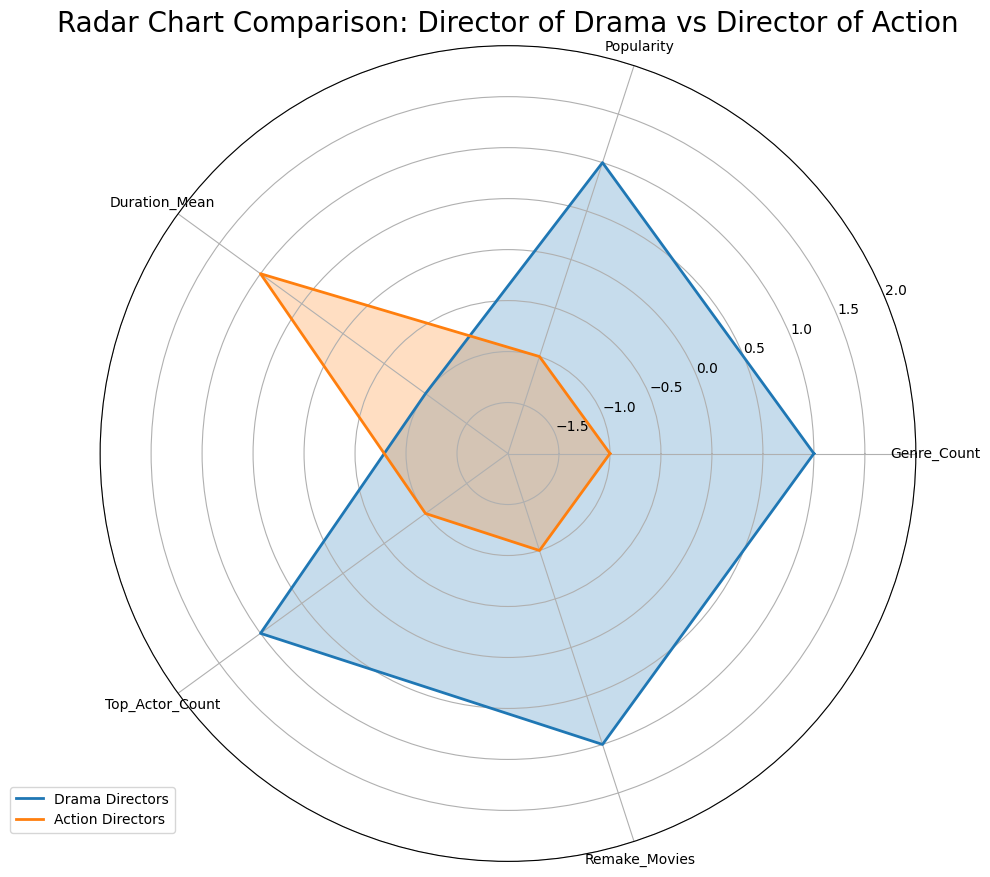

In [ ]:
# Normalize ข้อมูล
scaler = StandardScaler()
summary.iloc[:, 1:] = scaler.fit_transform(summary.iloc[:, 1:])

# สร้าง Radar Chart
labels = summary.columns[1:]
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for idx, genre in enumerate(['Drama Directors', 'Action Directors']):
    values = summary[summary['Director'] == genre].iloc[:, 1:].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=genre)
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_ylim(-2, 2)

# เพิ่ม Legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# แสดงผล
plt.title("Radar Chart Comparison: Director of Drama vs Director of Action", size=20)
plt.tight_layout()
plt.show()